<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/ML-2024/blob/main/LSTM_toyDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def input_data(seq, ws):
  output = []
  L = len(seq)
  for i in range((L) - ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    print(i)
    output.append((window, label))

  return output

In [12]:
class myLSTM(nn.Module):
  def __init__(self, input_size=1, hidden_size=50, out_size=1):
    super().__init__()
    self.hidden_size = hidden_size
    self.lstm = nn.LSTM(input_size, hidden_size)
    self.linear = nn.Linear(hidden_size, out_size)
    self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))

  def forward(self, seq):
    lstm_out, self.hidden = self.lstm(seq.view( len(seq),1,-1 ), self.hidden)
    pred = self.linear(lstm_out.view(len(seq) ,-1 ))
    return pred[-1]

In [8]:
x = torch.linspace(0,799, 800)
y = torch.sin(x * 2 * np.pi / 40)

test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]



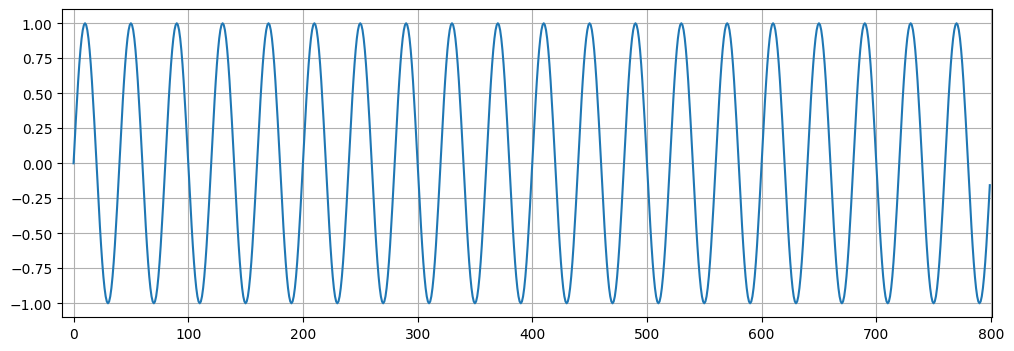

In [9]:
plt.figure(figsize = (12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy() )

In [11]:
window_size = 40
train_data = input_data(train_set, window_size)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Model

In [13]:
model = myLSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
print(model)

myLSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [15]:
for p in model.parameters():
  print(p.numel())

200
10000
200
200
50
1


In [16]:
epochs = 10
future = test_size
for i in range(epochs):
  for seq, y_train in train_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size) ,
                    torch.zeros(1,1,model.hidden_size))

    y_pred = model(seq)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

  print(f"Epoch {i} Loss {loss.item()} ")
  preds = train_set[-window_size:].tolist()

  for f in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
      model.hidden = (torch.zeros(1,1,model.hidden_size) ,
                      torch.zeros(1,1,model.hidden_size))
      preds.append(model(seq).item())

  loss = criterion(torch.tensor(preds[-window_size :]), y[760:] )
  print(f'Performance on test range: {loss}')

Epoch 0 Loss 0.08639351278543472 
Performance on test range: 0.6053528785705566
Epoch 1 Loss 0.05800500512123108 
Performance on test range: 0.5558286309242249
Epoch 2 Loss 0.02894119918346405 
Performance on test range: 0.4746955335140228
Epoch 3 Loss 0.005390910431742668 
Performance on test range: 0.240224689245224
Epoch 4 Loss 0.0004907596157863736 
Performance on test range: 0.023115597665309906
Epoch 5 Loss 0.0001677342370385304 
Performance on test range: 0.006026746705174446
Epoch 6 Loss 0.00012978473387192935 
Performance on test range: 0.004749992396682501
Epoch 7 Loss 0.0001149787858594209 
Performance on test range: 0.0041656820103526115
Epoch 8 Loss 0.00010362504690419883 
Performance on test range: 0.0037294155918061733
Epoch 9 Loss 9.37451550271362e-05 
Performance on test range: 0.0033806487917900085


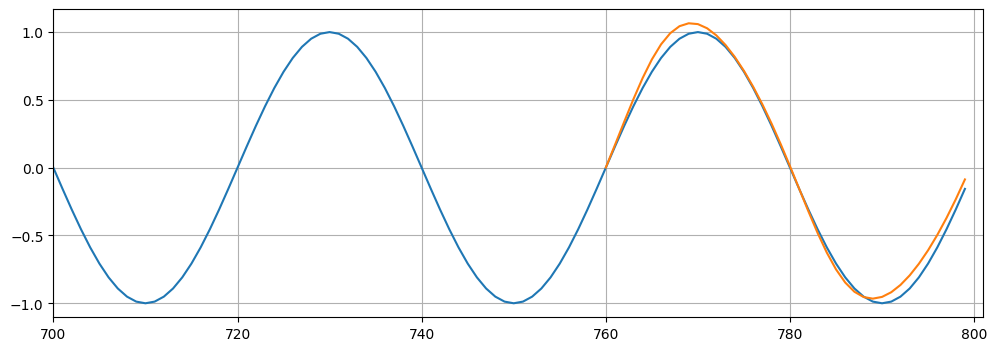

In [17]:
plt.figure(figsize=(12,4))
plt.xlim(700, 801)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(760,800), preds[window_size:])
plt.show()

The code was reproduced from [Data hackers](https://datahacker.rs/011-pytorch-rnn-with-pytorch/)